# GRUP 6 - ÖDEV 2

In [25]:
import tensorflow as tf
import numpy as np
import logging
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

**import tensorflow as tf:**  TensorFlow kütüphanesini içeri aktarır. TensorFlow, yapay zeka ve makine öğrenimi modelleri oluşturmak ve eğitmek için kullanılan popüler bir açık kaynaklı kütüphanedir.

**import numpy as np:** NumPy kütüphanesini içeri aktarır. NumPy, bilimsel hesaplamaları yapmak için kullanılan Python kütüphanesidir. Matrisler, diziler ve matematiksel fonksiyonlar gibi çok boyutlu veri yapılarını destekler.

**import logging:** Python'un logging modülünü içeri aktarır. logging, Python'da log kayıtları oluşturmak ve yönetmek için kullanılan bir modüldür.

**import seaborn as sns:** Seaborn kütüphanesini içeri aktarır. Seaborn, veri görselleştirmesi için kullanılan bir Python kütüphanesidir. Matplotlib'e dayanır ve daha çekici ve bilgilendirici grafikler oluşturmak için kullanılır.

**import matplotlib.pyplot as plt:** matplotlib.pyplot modülünü içeri aktarır. Matplotlib, Python'da grafik çizimi için kullanılan bir kütüphanedir. pyplot modülü, kullanıcıların grafikler oluşturmasına ve özelleştirmesine olanak tanır. plt kısaltması, genellikle matplotlib.pyplot modülüne erişmek için kullanılır.

**np.random.seed(42):** NumPy kütüphanesindeki rastgele sayı üretimini kontrol etmek için bir başlangıç ​​noktası (seed) belirler. Bu, kodun tekrarlanabilirliğini sağlar. Yani, kodun her çalıştırılmasında aynı rastgele sayılar üretilir.

**tf.random.set_seed(42):** TensorFlow kütüphanesindeki rastgele sayı üretimini kontrol etmek için bir başlangıç ​​noktası (seed) belirler. Bu, TensorFlow'un rastgele ağırlıkları ve diğer parametreleri başlatırken aynı sonuçları üretmesini sağlar. Bu da kodun tekrarlanabilirliğini sağlar

In [26]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Bu kod bloğu TensorFlow'un günlük (log) kayıtlarının seviyesini ayarlar.

**logger = tf.get_logger():**  tf.get_logger() fonksiyonu ile TensorFlow'un varsayılan logger'ı alınır. Bu logger, TensorFlow'un çalışması sırasında çeşitli mesajların kaydedilmesini sağlar.

**logger.setLevel(logging.ERROR):** logger'ın seviyesi logging.ERROR olarak ayarlanır. Bu, logger'ın yalnızca hata seviyesindeki mesajları kaydetmesini sağlar.

In [27]:
n1 = 1.0
n2 = 6.0
n3 = 8.0

a = (n1 + n2 + n3)
b = 10 * (n1 + n2 + n3)
c = (n1 + n2 + n3)
d = 2*n1 - n2 + n3

 ***n1***, ***n2*** ve ***n3*** adlı üç değişkene sırasıyla ödevde istendiği gibi öğrenci numaralarımız eklenir.

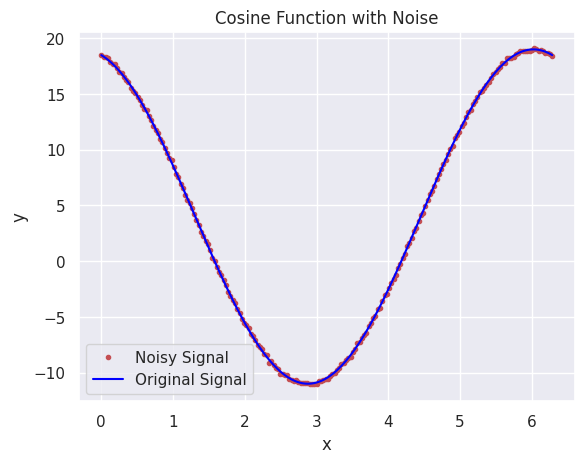

In [28]:
# İşaret fonksiyonu
def generate_y(x):
  return a * np.cos(b * x + np.deg2rad(c)) + d

# Periyot sayısı
b = 1

# x değerleri
x = np.linspace(0.0, (2*np.pi)/b, 200)

# Gürültü eklemek için bir rastgele dizi
noise = np.random.normal(0, 0.1, len(x))

# İşarete gürültüyü eklenir
y_with_noise = generate_y(x) + noise

y = y_with_noise

sns.set(style="darkgrid")
plt.plot(x, y_with_noise, 'ro', markersize=3, label='Noisy Signal')  # Gürültülü işareti nokta şeklinde çizilir
plt.plot(x, generate_y(x), color='blue', label='Original Signal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cosine Function with Noise')
plt.legend()
plt.show()

Yukarıdaki kod bloğu, bir işaret fonksiyonu **generate_y(x)** oluşturur. Bu işaret fonksiyonu, verilen x değerleri için bir kosinüs fonksiyonunun değerlerini hesaplar. Kod bloğunun ilgili bölümlerinde, işaret fonksiyonu için gerekli olan parametreler belirlenir: **periyot sayısı (b)**, **x değerleri (x)** ve **gürültü (noise)** eklenir.

Son olarak, işaret fonksiyonuna gürültü eklenerek y_with_noise oluşturulur ve bu işaret görselleştirilir. Görselleştirme işlemi, orijinal işareti ve gürültülü işareti aynı grafikte çizerek yapılır.

In [29]:
max_x = np.max(x)
x = x / max_x

x_train, x_test = x[:160], x[160:]
y_train, y_test = y[:160], y[160:]

print(f"x: {len(x_train)}, {len(x_test)}")
print(f"y: {len(y_train)}, {len(y_test)}")

x: 160, 40
y: 160, 40


In [30]:
def plot_history(history):
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.plot(history.history['loss'], label="Train Loss")
  plt.plot(history.history['val_loss'], label="Test Loss")
  plt.legend()
  plt.show()

In [31]:
def predict_and_plot(model, x_test, y_test):
  y_preds = model.predict(x_test)
  plt.scatter(x_test, y_test, c="red", label="Actual")
  plt.scatter(x_test, y_preds, c="green", label="Prediction")
  plt.legend()
  plt.show()

In [32]:
sl_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [33]:
sl_model.compile(
    loss = "mean_squared_error",
    optimizer = tf.keras.optimizers.Adam(0.1)
)

Bu kısım veri setinin normalleştirilmesi, eğitim ve test veri setlerine ayrılması, eğitim geçmişinin görselleştirilmesi, tahminlerin yapılması ve sonuçların görselleştirilmesi gibi işlemleri içerir.

**max_x = np.max(x)** ifadesi ile x değerlerinin maksimumu bulunur ve bu değer ile x değerleri normalize edilir.

**x_train, x_test = x[:160], x[160:] ve y_train, y_test = y[:160], y[160:]** ifadeleri ile veri seti eğitim ve test veri setlerine ayrılır. Bu durumda, ilk 160 veri noktası eğitim için kullanılırken, geri kalanlar test için kullanılır.

**plot_history(history)** fonksiyonu, eğitim geçmişini görselleştirir. Bu fonksiyon, eğitim ve test kaybının epoch sayısına göre nasıl değiştiğini gösteren bir grafik oluşturur.

**predict_and_plot(model, x_test, y_test)** fonksiyonu, modelin tahminlerini yapar ve gerçek değerlerle birlikte bu tahminleri görselleştirir. Bu sayede modelin performansı hakkında bir fikir edinilebilir.

Son olarak, **sl_model** adında basit bir doğrusal regresyon modeli tanımlanır. Bu model, yalnızca bir tane yoğun katman içerir. Modelin kaybı **mean_squared_error** olarak belirlenir ve optimizer olarak **Adam** kullanılır.

In [34]:
sl_history = sl_model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=False)
print("Model eğitildi.")

Model eğitildi.


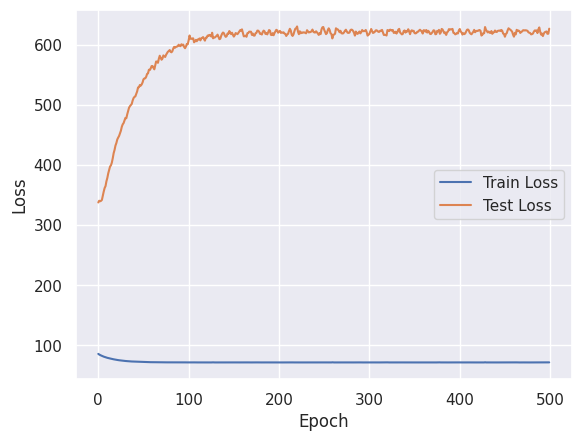

In [35]:
plot_history(sl_history)

2/2 [==============================] - 0s 6ms/step


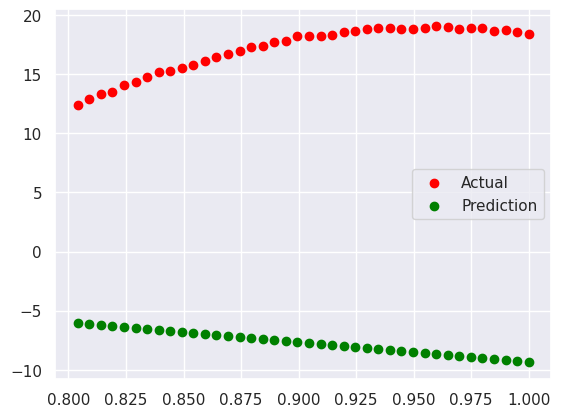

In [36]:
predict_and_plot(sl_model, x_test, y_test)

7/7 [==============================] - 0s 2ms/step


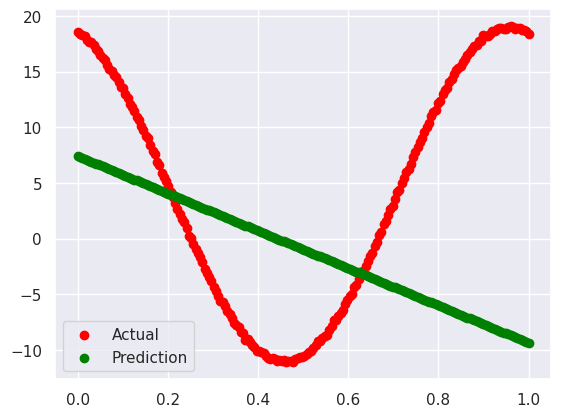

In [37]:
predict_and_plot(sl_model, x, y)

In [38]:
ml_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_shape=[1], activation="tanh"),
    tf.keras.layers.Dense(1)
])

In [39]:
ml_model.compile(
    loss="mean_squared_error",
    optimizer=tf.keras.optimizers.Adam(0.1)
)

In [40]:
ml_history = ml_model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=False)
print("Model eğitildi.")

Model eğitildi.


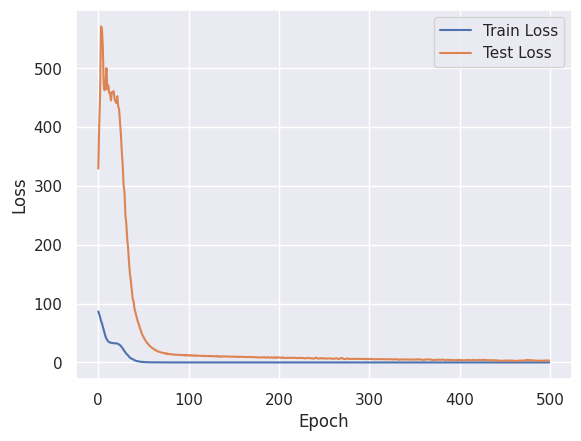

In [41]:
plot_history(ml_history)

2/2 [==============================] - 0s 5ms/step


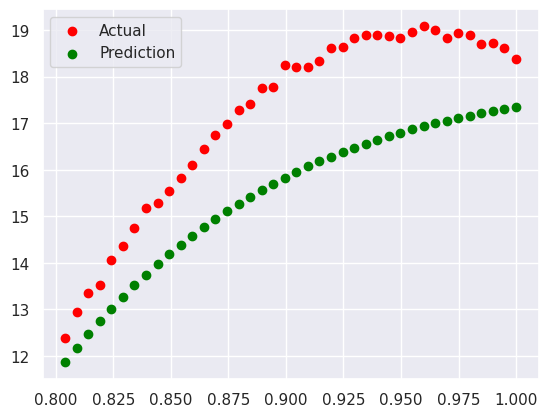

In [42]:
predict_and_plot(ml_model, x_test, y_test)

7/7 [==============================] - 0s 2ms/step


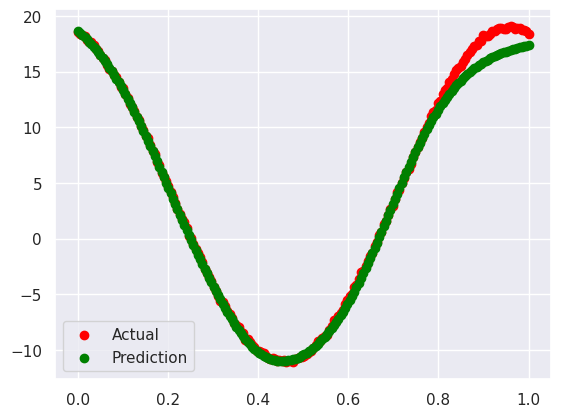

In [43]:
predict_and_plot(ml_model, x, y)


Son kısımda ise eğitim verileri üzerinde bir makine öğrenimi modelinin eğitilmesi, modelin geçmişinin görselleştirilmesi, modelin tahminlerinin yapılması ve sonuçların görselleştirilmesi işlemlerini içerir.

**sl_history = sl_model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=False)** ifadesi, basit bir doğrusal regresyon modelinin eğitilmesini sağlar. Model, eğitim verileri **(x_train ve y_train)** üzerinde **500 epoch** boyunca eğitilir. Modelin eğitim geçmişi **(sl_history)** değişkene atanır ve ayrıca eğitim sırasında her epoch için eğitim kaybı ve doğrulama **(validation)** kaybı hesaplanır.

print("Model eğitildi.") ifadesi, modelin **eğitiminin tamamlandığını** belirtir.

**plot_history(sl_history)** ifadesi, modelin eğitim geçmişini görselleştirir. Bu fonksiyon, eğitim ve doğrulama kaybının epoch sayısına göre nasıl değiştiğini gösteren bir grafik oluşturur.

**predict_and_plot(sl_model, x_test, y_test)** ifadesi, eğitilmiş modelin test verileri üzerinde tahminler yapmasını ve gerçek değerlerle birlikte bu tahminleri görselleştirmesini sağlar. Bu, modelin performansını değerlendirmeye yardımcı olur.

**predict_and_plot(sl_model, x, y)** ifadesi, eğitilmiş modelin tüm veri seti üzerinde tahminler yapmasını ve gerçek değerlerle birlikte bu tahminleri görselleştirmesini sağlar. Bu, modelin genel performansını değerlendirmeye yardımcı olur.

Benzer şekilde, **ml_model** adında bir çok katmanlı bir sinir ağı modeli tanımlanır. Bu model, iki yoğun katmandan oluşur ve ikinci katmanında hiperbolik tanjant aktivasyon fonksiyonu kullanır. Modelin eğitimi, aynı şekilde **ml_history** değişkenine atanır ve sonrasında eğitim geçmişi görselleştirilir. Son olarak, modelin test verileri ve tüm veri seti üzerindeki tahminleri yapılır ve görselleştirilir.

# ***SONUÇ***
Bu çalışmada, bir işaret fonksiyonunun tahminini gerçekleştirmek için basit bir doğrusal regresyon modeli ve daha karmaşık bir sinir ağı modeli kullanıldı. İşaret fonksiyonuna gürültü eklendi ve ardından bu iki model eğitildi. Ancak, gözlemlerimize göre, basit doğrusal regresyon modelinin performansı sınırlı kaldı. Elde ettiğimiz sonuçlara göre, sinir ağı modelinin daha karmaşık yapısına rağmen, basit doğrusal regresyon modelinden daha iyi performans göstermediğini fark ettik. Ayrıca, sinir ağı modelinin eğitim sürecinde daha fazla zaman ve kaynak gerektirdiğini ve karmaşıklığının artmasıyla birlikte verimliliğinin azaldığını gözlemledik.
